# NLP (Natural Language Processing) with Python

This is the notebook that goes along with the NLP video lecture!

In this lecture we will discuss a higher level overview of the basics of Natural Language Processing, which basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand!

Once you've completed this lecture you'll have a project using some Yelp Text Data!
    
**Requirements: You will need to have NLTK installed, along with downloading the corpus for stopwords. To download everything with a conda installation, run the cell below. Or reference the full video lecture**

## Get the Data

We'll be using a dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)! This dataset is already located in the folder for this section.

The file we are using contains a collection of more than 5 thousand SMS phone messages. You can check out the **readme** file for more info.

Let's go ahead and use rstrip() plus a list comprehension to get a list of all the lines of text messages:

In [2]:
import nltk

In [4]:
#nltk.download_shell()

In [5]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [7]:
len(messages)

5574

In [9]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [14]:
for mes_no,message in enumerate(messages[:10]):
    print(f'{mes_no} {message}\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. V

Due to the spacing we can tell that this is a [TSV](http://en.wikipedia.org/wiki/Tab-separated_values) ("tab separated values") file, where the first column is a label saying whether the given message is a normal message (commonly known as "ham") or "spam". The second column is the message itself. (Note our numbers aren't part of the file, they are just from the **enumerate** call).

Using these labeled ham and spam examples, we'll **train a machine learning model to learn to discriminate between ham/spam automatically**. Then, with a trained model, we'll be able to **classify arbitrary unlabeled messages** as ham or spam.

We can visualize our process. Below is the source code for wisualizing the flow chart from the official SciKit Learn documentation site:

In [37]:
import numpy as np
import pylab as pl
from matplotlib.patches import Circle, Rectangle, Polygon, Arrow, FancyArrow

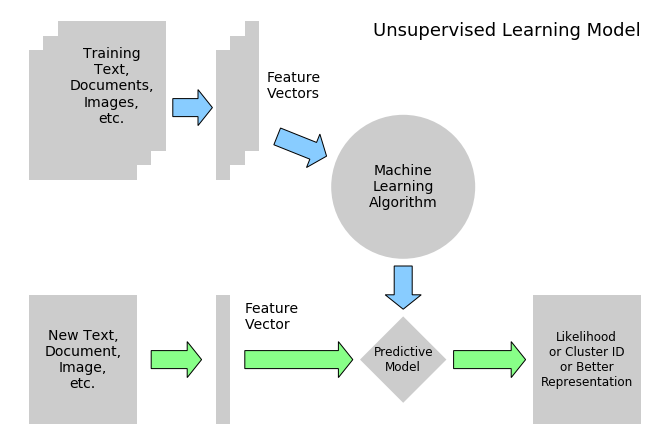

In [36]:
def create_base(box_bg = '#CCCCCC',
                arrow1 = '#88CCFF',
                arrow2 = '#88FF88',
                supervised=True):
    fig = pl.figure(figsize=(9, 6), facecolor='w')
    ax = pl.axes((0, 0, 1, 1),
                 xticks=[], yticks=[], frameon=False)
    ax.set_xlim(0, 9)
    ax.set_ylim(0, 6)

    patches = [Rectangle((0.3, 3.6), 1.5, 1.8, zorder=1, fc=box_bg),
               Rectangle((0.5, 3.8), 1.5, 1.8, zorder=2, fc=box_bg),
               Rectangle((0.7, 4.0), 1.5, 1.8, zorder=3, fc=box_bg),
               
               Rectangle((2.9, 3.6), 0.2, 1.8, fc=box_bg),
               Rectangle((3.1, 3.8), 0.2, 1.8, fc=box_bg),
               Rectangle((3.3, 4.0), 0.2, 1.8, fc=box_bg),
               
               Rectangle((0.3, 0.2), 1.5, 1.8, fc=box_bg),
               
               Rectangle((2.9, 0.2), 0.2, 1.8, fc=box_bg),
               
               Circle((5.5, 3.5), 1.0, fc=box_bg),
               
               Polygon([[5.5, 1.7],
                        [6.1, 1.1],
                        [5.5, 0.5],
                        [4.9, 1.1]], fc=box_bg),
               
               FancyArrow(2.3, 4.6, 0.35, 0, fc=arrow1,
                          width=0.25, head_width=0.5, head_length=0.2),
               
               FancyArrow(3.75, 4.2, 0.5, -0.2, fc=arrow1,
                          width=0.25, head_width=0.5, head_length=0.2),
               
               FancyArrow(5.5, 2.4, 0, -0.4, fc=arrow1,
                          width=0.25, head_width=0.5, head_length=0.2),
               
               FancyArrow(2.0, 1.1, 0.5, 0, fc=arrow2,
                          width=0.25, head_width=0.5, head_length=0.2),
               
               FancyArrow(3.3, 1.1, 1.3, 0, fc=arrow2,
                          width=0.25, head_width=0.5, head_length=0.2),
               
               FancyArrow(6.2, 1.1, 0.8, 0, fc=arrow2,
                          width=0.25, head_width=0.5, head_length=0.2)]


    patches += [Rectangle((7.3, 0.2), 1.5, 1.8, fc=box_bg)]
    
    for p in patches:
        ax.add_patch(p)
        
    pl.text(1.45, 4.9, "Training\nText,\nDocuments,\nImages,\netc.",
            ha='center', va='center', fontsize=14)
    
    pl.text(3.6, 4.9, "Feature\nVectors", 
            ha='left', va='center', fontsize=14)
    
    pl.text(5.5, 3.5, "Machine\nLearning\nAlgorithm",
            ha='center', va='center', fontsize=14)
    
    pl.text(1.05, 1.1, "New Text,\nDocument,\nImage,\netc.",
            ha='center', va='center', fontsize=14)
    
    pl.text(3.3, 1.7, "Feature\nVector", 
            ha='left', va='center', fontsize=14)
    
    pl.text(5.5, 1.1, "Predictive\nModel", 
            ha='center', va='center', fontsize=12)

    if supervised:
        pl.text(1.45, 3.05, "Labels",
                ha='center', va='center', fontsize=14)
    
        pl.text(8.05, 1.1, "Expected\nLabel",
                ha='center', va='center', fontsize=14)
        pl.text(8.8, 5.8, "Supervised Learning Model",
                ha='right', va='top', fontsize=18)

    else:
        pl.text(8.05, 1.1,
                "Likelihood\nor Cluster ID\nor Better\nRepresentation",
                ha='center', va='center', fontsize=12)
        pl.text(8.8, 5.8, "Unsupervised Learning Model",
                ha='right', va='top', fontsize=18)

def plot_unsupervised():
    create_base(supervised=False)

plot_unsupervised()

<img src='https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/_images/plot_ML_flow_chart_3.png' width=600/>

In [15]:
import pandas as pd

In [16]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [17]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

Let's check out some of the stats with some plots and the built-in methods in pandas!

In [30]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Let's use **groupby** to use describe by label, this way we can begin to think about the features that separate ham and spam!

In [33]:
messages.groupby('label').describe().transpose()

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

As we continue our analysis we want to start thinking about the features we are going to be using. This goes along with the general idea of [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering). The better your domain knowledge on the data, the better your ability to engineer more features from it. Feature engineering is a very large part of spam detection in general. I encourage you to read up on the topic!

Let's make a new column to detect how long the text messages are:

In [34]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Data Visualization
Let's visualize this! Let's do the imports:

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

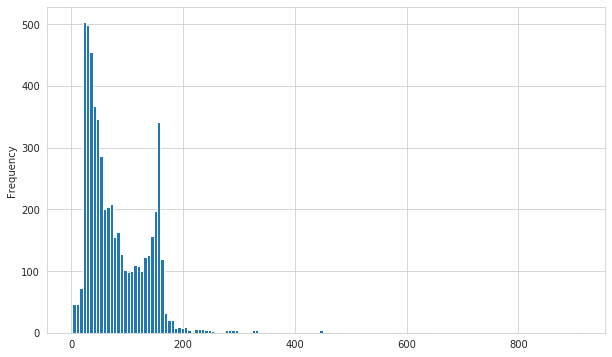

In [44]:
plt.figure(figsize=(10,6))
messages['length'].plot.hist(bins=150)

Play around with the bin size! Looks like text length may be a good feature to think about! Let's try to explain why the x-axis goes all the way to 1000ish, this must mean that there is some really long message!

In [45]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

Woah! 910 characters, let's use masking to find this message:

In [50]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Looks like we have some sort of Romeo sending texts! But let's focus back on the idea of trying to see if message length is a distinguishing feature between ham and spam:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efbbd0fba50>,
      dtype=object)

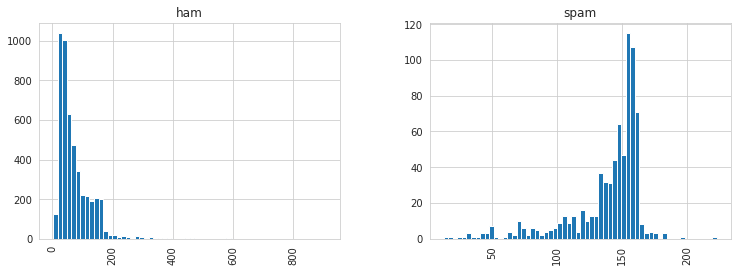

In [51]:
messages.hist(column='length', by='label', bins=60, figsize=(12,4))

Very interesting! Through just basic EDA we've been able to discover a trend that spam messages tend to have more characters. (Sorry Romeo!)

Now let's begin to process the data so we can eventually use it with SciKit Learn!

## Text Pre-processing

Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.


In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

Let's create a function that will process the string in the message column, then we can just use **apply()** in pandas do process all the text in the DataFrame.

First removing punctuation. We can just take advantage of Python's built-in **string** library to get a quick list of all the possible punctuation: